In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
churn_df = pd.read_csv(r"F:\Data_Science_Jupyter_Files\ChurnData.csv")

In [4]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [6]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]

In [7]:
churn_df["churn"] = churn_df["churn"].astype("int")
churn_df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


In [8]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [9]:
y = np.asarray(churn_df["churn"])
y[0:5]

array([1, 1, 0, 0, 0])

#### It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This helps the model learn faster and improves the model performance. We may make use of StandardScalar function in the Scikit-Learn library.

In [10]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

### Logistic Regression Classifier modeling

In [12]:
LR = LogisticRegression().fit(X_train, y_train)

#### Fitting, or in simple terms training, gives us a model that has now learnt from the traning data and can be used to predict the output variable. Let us predict the churn parameter for the test data set.

In [13]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

#### To understand this prediction, we can also have a look at the prediction probability of data point of the test data set. Use the function predict_proba , we can get the probability of each class. The first column is the probability of the record belonging to class 0, and second column that of class 1. Note that the class prediction system uses the threshold for class prediction as 0.5. This means that the class predicted is the one which is most likely.

In [15]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

#### Since the purpose here is to predict the 1 class more acccurately, you can also examine what role each input feature has to play in the prediction of the 1 class. Consider the code below.

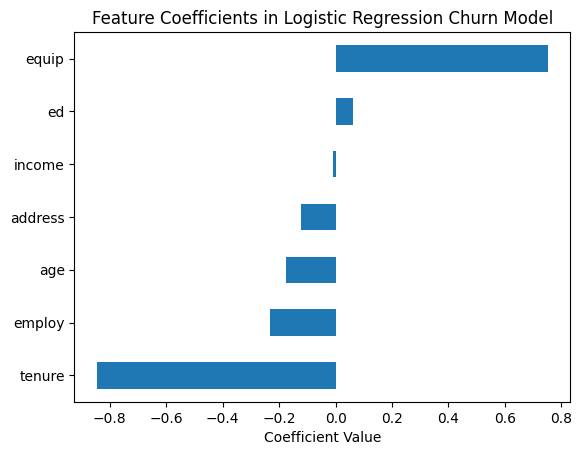

In [16]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind="barh")
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

### log loss

#### Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.

In [17]:
log_loss(y_test, yhat_prob)

0.6257718410257235

#### What happens to the log loss if we remove the feature 'equip' from the original set of input features?

In [20]:
churn_df_new = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'churn']]
churn_df_new["churn"] = churn_df_new["churn"].astype("int")
churn_df_new.head()

,tenure,age,address,income,ed,employ,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0


In [21]:
X = np.asarray(churn_df_new[['tenure', 'age', 'address', 'income', 'ed', 'employ']])
X[:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.],
       [ 33.,  33.,  12.,  33.,   2.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.],
       [ 38.,  35.,   5.,  76.,   2.,  10.],
       [  7.,  35.,  14.,  80.,   2.,  15.]])

In [22]:
y = np.asarray(churn_df_new["churn"])
y[:5]

array([1, 1, 0, 0, 0])

In [24]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

In [26]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_hat = LR.predict(X_test)

In [28]:
y_hat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [29]:
y_hat_prob = LR.predict_proba(X_test)
y_hat_prob[:10]

array([[0.83176135, 0.16823865],
       [0.90923185, 0.09076815],
       [0.80668816, 0.19331184],
       [0.89769641, 0.10230359],
       [0.75685775, 0.24314225],
       [0.63971421, 0.36028579],
       [0.54536777, 0.45463223],
       [0.89628447, 0.10371553],
       [0.36242837, 0.63757163],
       [0.91797445, 0.08202555]])

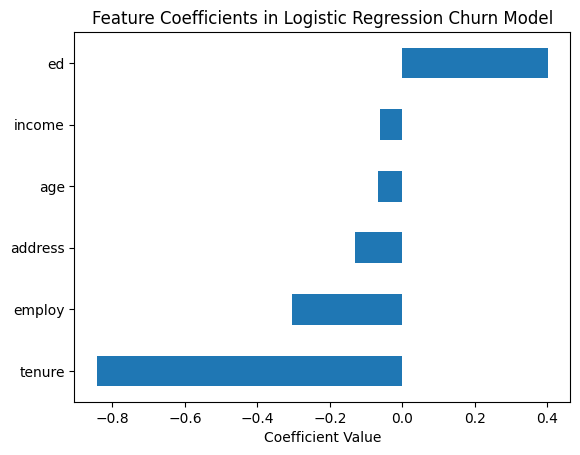

In [30]:
coefficient_ = pd.Series(LR.coef_[0], index=churn_df_new.columns[:-1])
coefficient_.sort_values().plot(kind="barh")
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [31]:
log_loss(y_test, y_hat_prob)

0.5302427350245369